# Logika rozmyta - zadanie zaliczeniowe

System generuje wartość przyspieszenia (-2 do 2 m/s²), która określa, czy tempomat powinien:

- Zwolnić (ujemne przyspieszenie)
- Utrzymać obecną prędkość (zerowe przyspieszenie)
- Przyspieszyć (dodatnie przyspieszenie)

## Importowanie biblioteki

Używamy biblioteki `simpful` do implementacji systemu logiki rozmytej.

In [22]:
from simpful import *

## Inicjalizacja systemu rozmytego

Tworzymy nowy obiekt systemu rozmytego, który będzie przechowywał wszystkie zmienne i reguły.

In [23]:
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful



## Definicja zmiennych lingwistycznych

Definiujemy cztery zmienne lingwistyczne:
1. **Prędkość** (speed): "wolna", "umiarkowana", "szybka"
2. **Odległość** (distance): "bliska", "bezpieczna", "daleka"
3. **Stan nawierzchni** (road_condition): "zły", "normalny", "dobry"
4. **Przyspieszenie** (acceleration): "zwolnij", "utrzymaj", "przyspiesz"

Każda zmienna ma zdefiniowany zakres wartości (wszechświat rozważań) oraz funkcje przynależności.

In [24]:
speed = AutoTriangle(3, terms=["slow", "moderate", "fast"], universe_of_discourse=[0, 120])
distance = AutoTriangle(3, terms=["close", "safe", "far"], universe_of_discourse=[0, 100])
road_condition = AutoTriangle(3, terms=["poor", "normal", "good"], universe_of_discourse=[0, 10])
acceleration = AutoTriangle(3, terms=["decelerate", "maintain", "accelerate"], universe_of_discourse=[-2, 2])

## Dodanie zmiennych do systemu

Dodajemy zdefiniowane zmienne lingwistyczne do systemu rozmytego.

In [25]:
FS.add_linguistic_variable("speed", speed)
FS.add_linguistic_variable("distance", distance)
FS.add_linguistic_variable("road_condition", road_condition)
FS.add_linguistic_variable("acceleration", acceleration)

## Wizualizacja zmiennych

Generujemy wykresy funkcji przynależności dla wszystkich zmiennych.

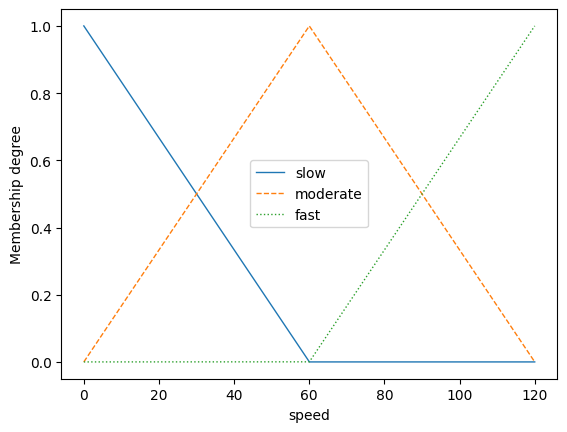

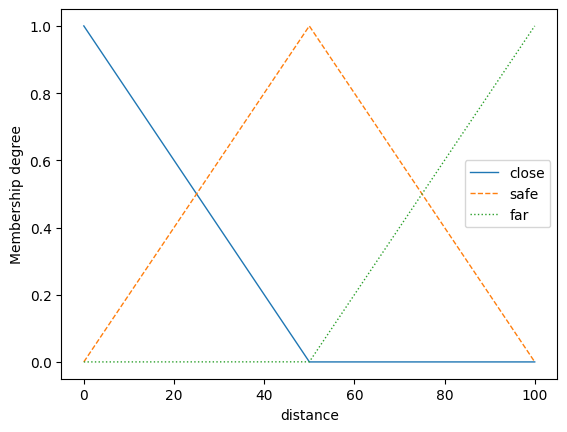

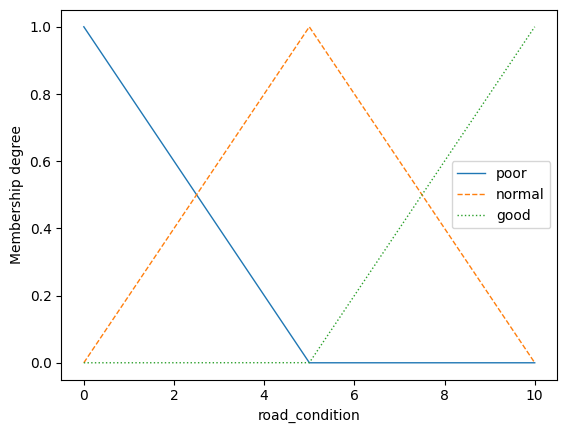

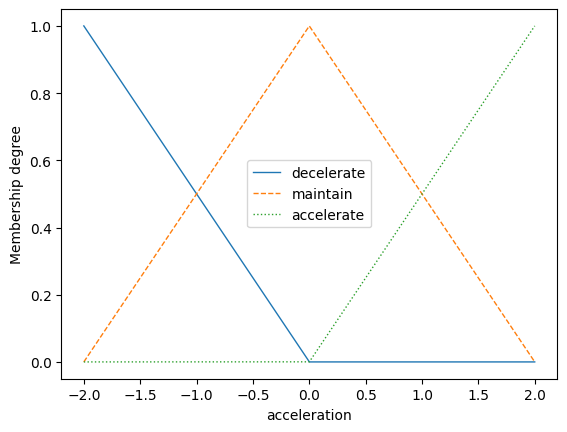

In [26]:
FS.plot_variable("speed")
FS.plot_variable("distance")
FS.plot_variable("road_condition")
FS.plot_variable("acceleration")

## Definicja reguł rozmytych

Definiujemy sześć reguł rozmytych, które określają zachowanie tempomatu:
1. Jeśli prędkość jest wysoka i odległość jest bliska, to zwolnij
2. Jeśli prędkość jest niska, odległość jest daleka i stan nawierzchni jest dobry, to przyspiesz
3. Jeśli prędkość jest umiarkowana i odległość jest bezpieczna, to utrzymaj prędkość
4. Jeśli stan nawierzchni jest zły, to zwolnij
5. Jeśli odległość jest bliska i stan nawierzchni jest zły, to zwolnij
6. Jeśli prędkość jest wysoka LUB odległość jest bliska, to zwolnij

In [27]:
rules = [
    "IF (speed IS fast) AND (distance IS close) THEN (acceleration IS decelerate)",
    "IF (speed IS slow) AND (distance IS far) AND (road_condition IS good) THEN (acceleration IS accelerate)",
    "IF (speed IS moderate) AND (distance IS safe) THEN (acceleration IS maintain)",
    "IF (road_condition IS poor) THEN (acceleration IS decelerate)",
    "IF (distance IS close) AND (road_condition IS poor) THEN (acceleration IS decelerate)",
    "IF (speed IS fast) OR (distance IS close) THEN (acceleration IS decelerate)"
]

## Dodanie reguł do systemu

Dodajemy zdefiniowane reguły rozmyte do systemu.

In [28]:
FS.add_rules(rules)

## Funkcja kontroli tempomatu

Funkcja `control_cruise` przyjmuje trzy parametry:
- `current_speed`: aktualna prędkość pojazdu
- `current_distance`: aktualna odległość od pojazdu z przodu
- `current_road_condition`: aktualny stan nawierzchni

Funkcja ustawia wartości zmiennych wejściowych i wykonuje wnioskowanie Mamdaniego, zwracając zalecaną wartość przyspieszenia.

In [29]:
def control_cruise(current_speed, current_distance, current_road_condition):
    FS.set_variable("speed", current_speed)
    FS.set_variable("distance", current_distance)
    FS.set_variable("road_condition", current_road_condition)
    
    result = FS.Mamdani_inference(["acceleration"])
    return result

## Testowanie systemu

Testujemy system na dwóch scenariuszach:
1. Wysoka prędkość, bliska odległość, dobry stan nawierzchni
2. Niska prędkość, daleka odległość, zły stan nawierzchni
3. Umiarkowana prędkość, bezpieczna odległość, dobry stan nawierzchni
4. Wysoka prędkość, daleka odległość, zły stan nawierzchni
5. Niska prędkość, bliska odległość, dobry stan nawierzchni
6. Umiarkowana prędkość, bliska odległość, normalny stan nawierzchni
7. Wysoka prędkość, bezpieczna odległość, zły stan nawierzchni
8. Niska prędkość, bezpieczna odległość, dobry stan nawierzchni

In [30]:
# Scenario 1: High speed, close distance, good road
result1 = control_cruise(100, 20, 8)
print("Scenariusz 1 - Wysoka prędkość, bliska odległość, dobry stan nawierzchni:")
print(f"Zalecane przyspieszenie: {result1['acceleration']:.2f}")

# Scenario 2: Low speed, far distance, poor road
result2 = control_cruise(30, 80, 3)
print("\nScenariusz 2 - Niska prędkość, daleka odległość, zły stan nawierzchni:")
print(f"Zalecane przyspieszenie: {result2['acceleration']:.2f}")

# Scenario 3: Moderate speed, safe distance, good road
result3 = control_cruise(60, 50, 9)
print("\nScenariusz 3 - Umiarkowana prędkość, bezpieczna odległość, dobry stan nawierzchni:")
print(f"Zalecane przyspieszenie: {result3['acceleration']:.2f}")

# Scenario 4: High speed, far distance, poor road
result4 = control_cruise(110, 90, 2)
print("\nScenariusz 4 - Wysoka prędkość, daleka odległość, zły stan nawierzchni:")
print(f"Zalecane przyspieszenie: {result4['acceleration']:.2f}")

# Scenario 5: Low speed, close distance, good road
result5 = control_cruise(20, 15, 8)
print("\nScenariusz 5 - Niska prędkość, bliska odległość, dobry stan nawierzchni:")
print(f"Zalecane przyspieszenie: {result5['acceleration']:.2f}")

# Scenario 6: Moderate speed, close distance, normal road
result6 = control_cruise(70, 25, 5)
print("\nScenariusz 6 - Umiarkowana prędkość, bliska odległość, normalny stan nawierzchni:")
print(f"Zalecane przyspieszenie: {result6['acceleration']:.2f}")

# Scenario 7: High speed, safe distance, poor road
result7 = control_cruise(95, 60, 3)
print("\nScenariusz 7 - Wysoka prędkość, bezpieczna odległość, zły stan nawierzchni:")
print(f"Zalecane przyspieszenie: {result7['acceleration']:.2f}")

# Scenario 8: Low speed, safe distance, good road
result8 = control_cruise(40, 55, 9)
print("\nScenariusz 8 - Niska prędkość, bezpieczna odległość, dobry stan nawierzchni:")
print(f"Zalecane przyspieszenie: {result8['acceleration']:.2f}")

Scenariusz 1 - Wysoka prędkość, bliska odległość, dobry stan nawierzchni:
Zalecane przyspieszenie: -0.45

Scenariusz 2 - Niska prędkość, daleka odległość, zły stan nawierzchni:
Zalecane przyspieszenie: -0.19

Scenariusz 3 - Umiarkowana prędkość, bezpieczna odległość, dobry stan nawierzchni:
Zalecane przyspieszenie: 0.00

Scenariusz 4 - Wysoka prędkość, daleka odległość, zły stan nawierzchni:
Zalecane przyspieszenie: -0.77

Scenariusz 5 - Niska prędkość, bliska odległość, dobry stan nawierzchni:
Zalecane przyspieszenie: -0.50

Scenariusz 6 - Umiarkowana prędkość, bliska odległość, normalny stan nawierzchni:
Zalecane przyspieszenie: -0.24

Scenariusz 7 - Wysoka prędkość, bezpieczna odległość, zły stan nawierzchni:
Zalecane przyspieszenie: -0.33

Scenariusz 8 - Niska prędkość, bezpieczna odległość, dobry stan nawierzchni:
Zalecane przyspieszenie: 0.01
